<a href="https://colab.research.google.com/github/gsfreitas/engenharia-medica/blob/main/atividade_probabilidades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 1 - Probabilidade e Inferência

No arquivo “Atividade 1.mat” da Aula 03 (ver Classroom) você encontrará uma matriz “dados” com 4 linhas e 200 colunas. Cada linha corresponde a uma medida de velocidade de condução nervosa (em m/s) que foi coletada em um grupo de 200 indivíduos saudáveis. Reduções significativas nessas velocidades de condução podem estar associadas a diferentes condições patológicas, como doenças desmielinizantes, neurodegenerativas ou como a síndrome do túnel do carpo. Esta condição consiste no estreitamento da região do pulso por onde passa o nervo mediano (ver figura abaixo). Um dos testes diagnósticos realizados envolve justamente comparar a condução nervosa dos pacientes com os dados obtidos em indivíduos saudáveis em um exame de eletroneurografia. Conduções nervosas em indivíduos saudáveis observam distribuições aproximadamente gaussianas e a comparação de medidas registradas em pacientes com estas distribuições obtidas em saudáveis podem levar ao diagnóstico da Síndrome.

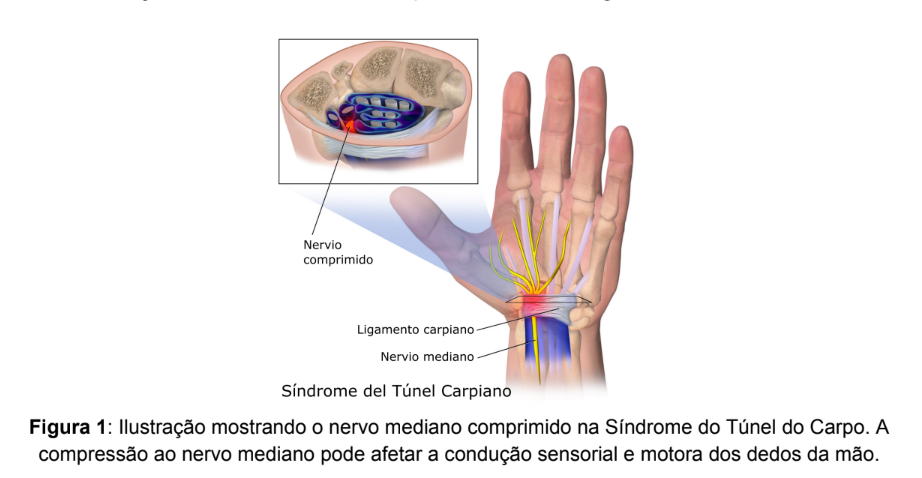

Essas são as variáveis correspondentes à matriz contida no arquivo: Linha 1: medida de condução motora (CMAP) do nervo mediano (mCMAP); Linha 2: medida de condução sensorial (SNAP) do nervo mediano (mSNAP); Linha 3: CMAP do nervo ulnar (uCMAP), Linha 4: SNAP do nervo ulnar (uSNAP). Suponha que estes dados resultem de uma amostragem aleatória na população de indivíduos hígidos.

In [3]:
# importando as bibliotecas
import pandas as pd
import numpy as np
from scipy.stats import shapiro
import scipy.io
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, multivariate_normal

In [4]:
# lendo o arquivo
df = scipy.io.loadmat('/content/drive/MyDrive/ict-unifesp/2023.2/engenharia-medica/aula3/Atividade 1.mat')['dados']

# separando os dados
mcmap = df[0]
msnap = df[1]
ucmap = df[2]
usnap = df[3]

**A)** Inicialmente, trate essas quatro medidas separadamente e estime a velocidade de condução média para as fibras motoras e sensoriais de cada nervo e suas respectivas variâncias [Resposta: medias = 58.71m/s, 50.09m s, 54.99m/s, 59.91m/s; variâncias = 5.07m2/s2, 4.44m2/s2, 1.97m2/s2, 2.95m2/s2].

In [5]:
# cálculo das médias e variâncias
data = [mcmap, msnap, ucmap, usnap]
means = []
var = []

for itens in data:
  means.append(np.round(np.mean(itens),2))
  var.append(np.round(np.var(itens,ddof=True),2))

print(f"Médias {means}")
print(f"Vatrâncias {var}")

Médias [58.71, 50.09, 55.0, 59.91]
Vatrâncias [5.07, 4.44, 1.97, 2.95]


**B)** Plote os histogramas para cada medida separadamente e teste a normalidade destas distribuições. Se você utilizar o Matlab, você pode usar o teste “Shapiro-Wilk” disponível no material da Aula 03: “swtest.m”. Se você usar o Python, empregue o módulo shapiro-wilk do scipy.stats. Analisando estas distribuições e o resultado do teste de normalidade, você deve rejeitar a hipótese de normalidade?

**C)** Estas mesmas medidas foram coletadas em um paciente com suspeita de desmelienização seletiva nos nervos periféricos. Os resultados obtidos no paciente foram os seguintes: mCMAP = 56 m/s; mSNAP = 52 m/s; uCMAP = 54 m/s; uSNAP = 61 m/s. Plote esses valores junto às distribuições do item B

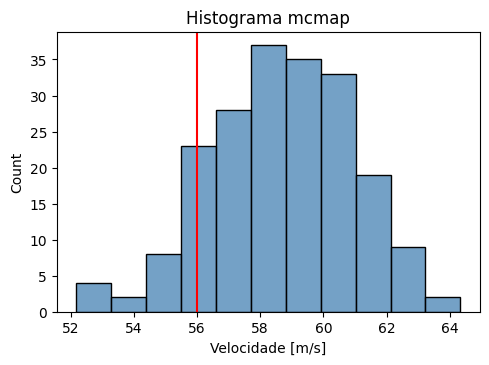

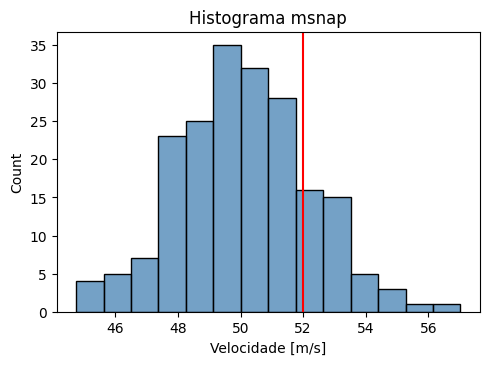

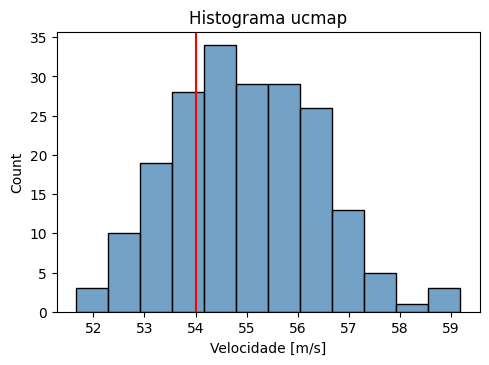

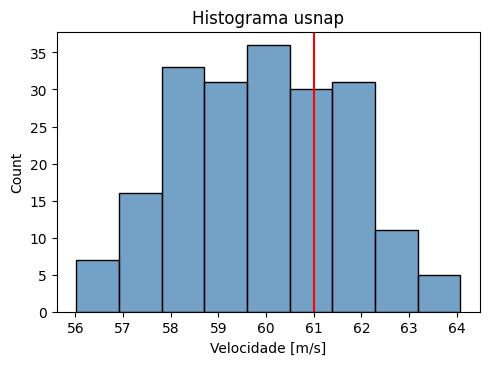

In [6]:
# criando as visualizações
names = ["mcmap", "msnap", "ucmap", "usnap"]
results = [56,52,54,61]
shapiro = []

for index in range(0,len(data)):
  plt.figure(figsize=(12,8))
  plt.subplot(2,2,index+1)
  plt.title(f"Histograma {names[index]}")

  shapiro.append(stats.shapiro(data[index]))

  sns.histplot(data=data[index],color='steelblue')
  plt.axvline(x=results[index],color='red')
  plt.xlabel('Velocidade [m/s]')
  plt.show()

In [8]:
# analisando as distribuições
for index in range(0,len(names)):
  print(f"{names[index]}:{shapiro[index]}")

mcmap:ShapiroResult(statistic=0.9914844036102295, pvalue=0.2909250557422638)
msnap:ShapiroResult(statistic=0.99591064453125, pvalue=0.8722327351570129)
ucmap:ShapiroResult(statistic=0.9926678538322449, pvalue=0.4182417690753937)
usnap:ShapiroResult(statistic=0.989329993724823, pvalue=0.1423974484205246)


*Através da análise do valor estatístico e do p-valor, então não devemos rejeitar a hipótese de normalidade.*

**D)** Para cada variável isoladamente, assumindo que as distribuições nos indivíduos saudáveis sejam gaussianas e que possuam média e variância como aquelas estimadas no item 1 acima, encontre a probabilidade de um indivíduo saudável possuir valores de condutividade abaixo dos valores obtidos neste paciente. *[Dica: no matlab, explore a função “normcdf” e utilize-a para calcular a distribuição normal cumulada; no python empregue o método norm.cdf do scipy.stats ].* Comparando esta probabilidade com um limiar de 5%, o que você pode concluir a respeito do paciente em relação a cada medida separadamente?

In [9]:
# calculando as probabilidades
for index in range(0,4):
  print(f"Probabilidade {names[index]}: {np.round(norm.cdf(results[index],np.mean(data[index]),np.std(data[index]))*100,2)}%")

Probabilidade mcmap: 11.38%
Probabilidade msnap: 81.79%
Probabilidade ucmap: 23.81%
Probabilidade usnap: 73.83%


*Ou seja, 11% possuem uma condutância menor que a medida do paciente. Como o limite é de 5% para este teste, então nós devemos não rejeitamos a hipótese nula (de que o paciente em questão é saudável). Um outro exemplo, é que 81% da amostra possui uma velocidade menor que a do paciente. Como o ideal é a velocidade ser alta, então o paciente é saudável.*

**E)** Agora estime a matriz de covariância entre as medidas na população
de indivíduos hígidos *[Matlab: veja a função “cov”; Python: veja o método cov do numpy]*. Com esta nova informação, e supondo que a população controle venha de uma distribuição gaussiana multivariada, o que você poderia concluir a respeito do paciente? Você saberia explicar este resultado? *[Dica: no matlab, explore a função “mvncdf” e utilize-a para calcular a probabilidade multivariada cumulada; no Python você pode empregar o método multivariate_normal.cdf do scipy stats]*

In [ ]:
# calculo da covariância
C = [*mcmap, *msnap, *ucmap, *usnap]
C = np.cov(C)